In [5]:
from IPython.display import display, Markdown, Latex
from decimal import Decimal
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import math as mt

# Solutions to Modern Data Science Problems (problems till 27.11)
by *Nora Salone* 

### Problem 28

We want to use the KNN algorithm for the classification problem. We consider a
training sample of N=106 points, which are distributed approximately uniformly on the
available feature space . Calculate the mean distance between neighbors assuming:
* The feature space is 1-D X =[X1], X1 in the range of [0,1]
* The feature space is 2-D X =[X1 ,X2 ], Xi in the range of [0,1] 
* The feature space is 3-D X =[X1,X2 , X3 ], Xi in the range of [0,1]
* The feature space is 10-D X =[X1,X2 , X3 ,…, X10 ], Xi in the range of [0,1]
* How many points do we need for 10-D feature space to keep the same distance between the neighbors as in the first case ?

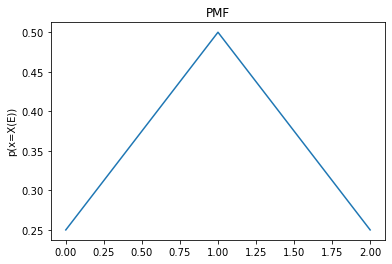

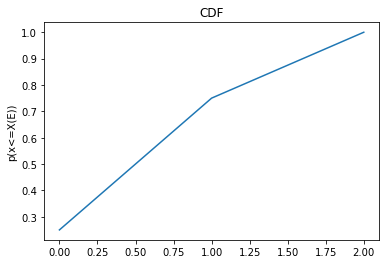

In [2]:
#Assign each event a random discrete variable and its value
data=np.array([["HT", 1],["TH",1],["HH",2],["TT",0]])
classes=3

def PMF(data):
    pmf=np.array([0]*classes)
    for i in range(len(data)):
        if data[i][1]=="0": #specific X(E)
            pmf[0] += 1
        elif data[i][1]=="1":
            pmf[1] += 1
        elif data[i][1]=="2":
            pmf[2] += 1
        #print("i =",i,"data[i][1] =",data[i][1],"pmf =",pmf)
    pmf=pmf/np.sum(pmf)
    return pmf

pmf=PMF(data)
plt.plot(pmf)
plt.ylabel('p(x=X(E))')
plt.title('PMF')
plt.show()

def CDF(data):
    for i in range(3):
        if i in range(1):
            cdf = pmf[0]
        elif i in range(2):
            cdf = pmf[0]+pmf[1]
        elif i in range(3):
            cdf = pmf[0]+ pmf[1]+pmf[2]
        cdf = np.sum(pmf[i])
        #print("cdf=",cdf,"i=",i)
    return cdf

#cdf=CDF(data): this is my attempt to produce a CDF for this set, before finding out np.cumsum
cdf=np.cumsum(pmf)

plt.plot(cdf)
plt.ylabel('p(x<=X(E))')
plt.title('CDF')
plt.show()


### Problem 29
Derive OLS solution for simple linear regression model $f_θ(x) = θ_1 \cdot x + θ_0$.

### Problem 30
Download the data file from:
http://koza.if.uj.edu.pl/~krzemien/machine_learning2021/materials/datasets/data1.csv
and write a program that for every dataset separately calculates:
* E[X], E[Y],
* Var(X), Var(Y),
* Cov(X,Y)
* Pearson correlation coefficients
Visualize the data (X vs Y). Visualize the means and variances for all datasets (e.g. E[X] vs dataset number)

Notebook: https://github.com/wkrzemien/dataScienceAndML2020/blob/master/notebooks/intro/simple_load_data.ipynb

In [40]:
import random

def expval(X): #expected value
    expval = sum(X)/len(X)
    return expval

def variance(X):
    diff=[]
    square=[]
    for i in range(len(X)):
        diff.append(X[i]-expval(X))   
        square.append(diff[i]*diff[i])
    var = expval(square)
    return var

def covariance(X,Y):
    prod=[]
    for i in range(len(X)):
        prod.append(X[i]*Y[i])    
    cov = expval(prod)-expval(X)*expval(Y)
    return cov

def std_dev(X):
    std = np.sqrt(variance(X))
    return std

def pears_rho(X,Y):
    rho = covariance(X,Y)/(std_dev(X)*std_dev(Y))
    return rho    

In [2]:
input_file = 'data1.csv'

In [6]:
data = pd.read_csv(input_file)

In [7]:
data.head()

,x,y,dataSet
0,10,8.04,0
1,8,6.95,0
2,13,7.58,0
3,9,8.81,0
4,11,8.33,0


In [8]:
data.dtypes

x            int64
y          float64
dataSet      int64
dtype: object

In [9]:
print(data.columns.values)

['x' 'y' 'dataSet']


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        44 non-null     int64  
 1   y        44 non-null     float64
 2   dataSet  44 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.2 KB


In [11]:
data.describe()

,x,y,dataSet
count,44.000000,44.000000,44.00000
mean,9.000000,7.500682,1.50000
std,3.198837,1.958925,1.13096
min,4.000000,3.100000,0.00000
25%,7.000000,6.117500,0.75000
50%,8.000000,7.520000,1.50000
75%,11.000000,8.747500,2.25000
max,19.000000,12.740000,3.00000


In [12]:
data[data['dataSet']==0].count()

x          11
y          11
dataSet    11
dtype: int64

In [13]:
data.count()

x          44
y          44
dataSet    44
dtype: int64

In [14]:
data[['y','dataSet']].groupby(['dataSet'],as_index=False).mean().sort_values(by='dataSet')

,dataSet,y
0,0,7.500909
1,1,7.500909
2,2,7.500000
3,3,7.500909


In [15]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

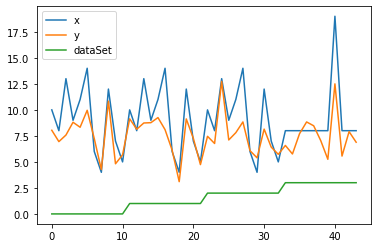

In [16]:
data.plot()

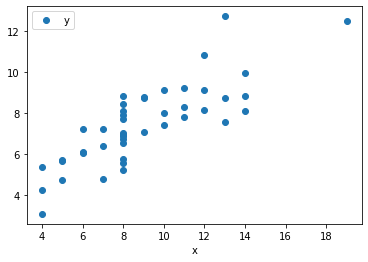

In [17]:
data.plot(x='x', y='y', style='o')

In [42]:
df = pd.DataFrame(data)
index = df.index
columns = df.columns
values = df.values
#print("index=",index)
#print("columns=",columns)
#print("values",values)

In [43]:
x =df['x']
y = df['y']
E_x = expval(x)
E_y = expval(y)
Var_x = variance(x)
Var_y = variance(y)
Cov_xy = covariance(x,y)
rho_xy = pears_rho(x,y)

print("E[X]=",E_x,"E[Y]=",E_y,"Var(X)=",Var_x,"Var(Y)=",Var_y,"Cov(X,Y)=",Cov_xy,"rho_XY=",rho_xy)

E[X]= 9.0 E[Y]= 7.50068181818182 Var(X)= 10.0 Var(Y)= 3.7501745351239677 Cov(X,Y)= 4.999318181818168 rho_XY= 0.8163662427614676
